In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import requests
import geopandas as gpd
from shapely.geometry import Point
import folium
import fsspec

In [3]:
url = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2023-01-01&endtime=2023-12-31&minmagnitude=5"
response = requests.get(url)
data = response.json()

In [4]:
lats = [feature['geometry']['coordinates'][1] for feature in data['features']]
lons = [feature['geometry']['coordinates'][0] for feature in data['features']]
mags = [feature['properties']['mag'] for feature in data['features']]

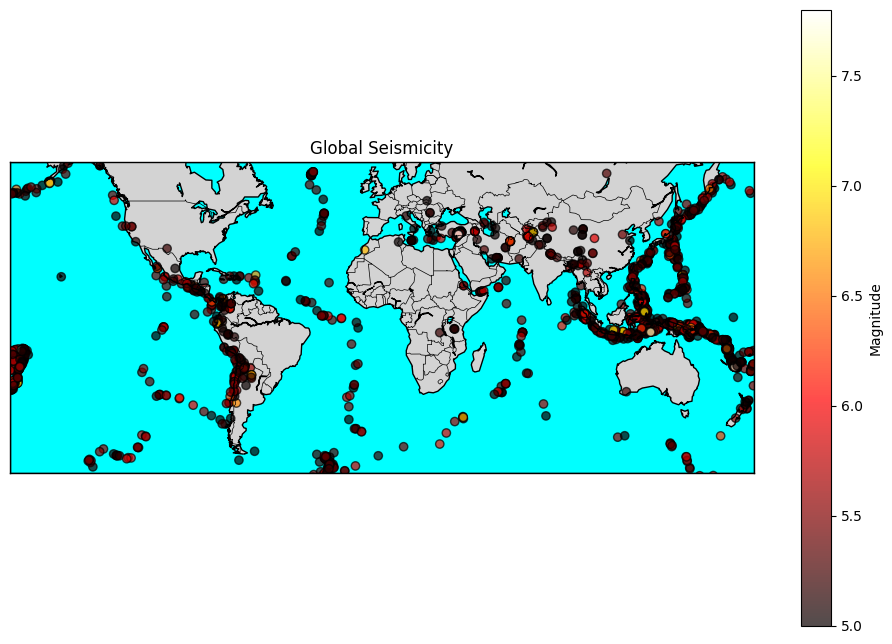

In [5]:
plt.figure(figsize=(12, 8))
m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=60, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')
x, y = m(lons, lats)
sc = m.scatter(x, y, c=mags, cmap='hot', marker='o', edgecolor='k', alpha=0.7)
plt.colorbar(sc, label='Magnitude')
plt.title('Global Seismicity')
plt.show()

In [6]:
earthquakes = pd.read_csv('2.5_month.csv')

In [13]:
earthquakes['latitude'] = earthquakes['latitude']
earthquakes['longitude'] = earthquakes['longitude']
earthquakes['magnitude'] = earthquakes['mag']
earthquakes['place'] = earthquakes['place']

In [14]:
m = folium.Map(location=[0, 0], zoom_start=2)

In [15]:
for idx, row in earthquakes.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['magnitude'] * 2,
        popup=f"Location: {row['place']}<br>Magnitude: {row['magnitude']}",
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

In [16]:
m.save('seismicity_map.html')

In [17]:
m